# Test EV control

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ev_ssm import ev_ssm
from tqdm import tqdm
import scipy.stats as stats

In [2]:
# manually search perceptron hyperparameters for binary classification
import cProfile as profile
import pstats

In [3]:
# --- Response ---
from ev_ssm import ev_ssm
import numpy as np

sse = ev_ssm(ts=18, N=10000, step=1, tp=40,
             lr=0.1, lp=40, seed=2022, name="EVA",
             n_pref=1, is_report=True,
             tt_mean=0.5, tt_var=0.2, tt_lb=0, tt_ub=1,
             ict_off=False, ecc_off=False)
sse.load_A("Aest.csv")

evd0 = sse.ev.copy()

# quiet some EVs by force
# np.random.seed(sse.config["seed"])
# ict_rid = np.random.randint(low=0,
#                             high=sse.ev.shape[0],
#                             size=3000)

# sse.ev.na.iloc[ict_rid] = sse.ev.nam.iloc[ict_rid]
# sse.ev.lc.iloc[ict_rid] = 1
# sse.g_u()

# initial EV data
evd0 = sse.ev.copy()

sse.g_frc()

/nfs/home/jwang175/.conda/envs/andes/lib/python3.9/site-packages/swifter/swifter.py:87: UserWarning: This pandas object has duplicate indices, and swifter may not be able to improve performance. Consider resetting the indices with `df.reset_index(drop=True)`.
  warnings.warn(
/nfs/home/jwang175/work/andes/jwang/notes/ev_ssm.py:493: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.ev['agc'] = 0  # `agc` is indicator of participation of AGC
/nfs/home/jwang175/work/andes/jwang/notes/ev_ssm.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

[23.854641457198355, 2.0163585171616365]

In [4]:
sse.ev['lc']

0       0
1       0
2       1
3       0
4       0
       ..
3505    0
3506    0
3507    0
3508    0
3509    0
Name: lc, Length: 3510, dtype: int64

In [5]:
self = sse
self.ev[self.ev["na"].values >= self.ev["nam"].values].index


Int64Index([   2,   10,   31,  206,  239,  253,  265,  394,  399,  439,  446,
             551,  674,  680,  735,  746,  762,  796,  840,  896,  910,  920,
             926,  949,  969, 1006, 1013, 1058, 1213, 1225, 1254, 1256, 1363,
            1373, 1444, 1488, 1522, 1622, 1624, 1689, 1786, 1844, 2062, 2192,
            2236, 2241, 2324, 2349, 2354, 2359, 2367, 2405, 2408, 2451, 2478,
            2482, 2491, 2540, 2542, 2563, 2569, 2575, 2650, 2678, 2746, 2781,
            2831, 2927, 2936, 2937, 2962, 3020, 3029, 3077, 3119, 3166, 3171,
            3235, 3310, 3311, 3369, 3415, 3495, 3498, 3503],
           dtype='int64')

In [6]:
self.ev["na"]

0       1996
1       2134
2       2179
3       1927
4       1982
        ... 
3505    1776
3506    1602
3507    1923
3508    1756
3509    1646
Name: na, Length: 3510, dtype: int64

In [7]:
prof = profile.Profile()
prof.enable()
for i in range(20):
        sse.run(tf=18 + i/3600, Pi=0.5*i,
                is_updateA=False, is_rstate=True,
                is_test=False, disable=True,
                )
for i in range(20):
        sse.run(tf=18 + (20 + i)/3600, Pi=10 - 0.5*i,
                is_updateA=False, is_rstate=True,
                is_test=False, disable=True)
prof.disable()

EVA: end time 18.0[H] is too close to start time 18[H],simulation will not start.


(<Figure size 600x300 with 1 Axes>,
 <AxesSubplot:title={'center':'AGC response'}, xlabel='Time [s]', ylabel='Power (MW)'>)

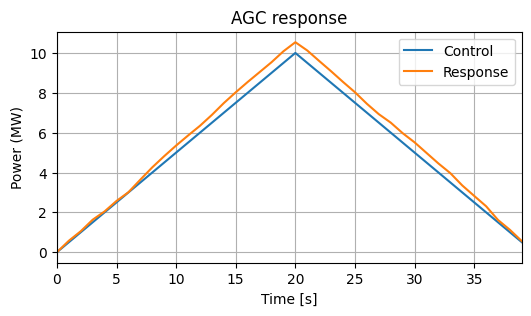

In [8]:
sse.plot_agc()

In [9]:
sse.ev.iloc[0]

u                  1
u0                 1
soc         0.636582
bd                 0
c                  1
c2                 0
c0                 0
sx                12
dP          5.118249
xl      [[], [], []]
soci        0.273576
socd        0.783325
Pc          5.577969
Pd          5.577969
nc          0.917583
nd          0.917583
Q          22.184485
ts         16.437424
tf         23.028202
tt           0.39026
pref               0
lc             False
agc                0
mod                0
na              1996
nam             3216
Name: 0, dtype: object

In [10]:
stats = pstats.Stats(prof).strip_dirs().sort_stats("tottime")
stats.print_stats(20)

         125970488 function calls (125887320 primitive calls) in 45.905 seconds

   Ordered by: internal time
   List reduced from 1148 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  6328646    8.500    0.000   19.653    0.000 series.py:943(__getitem__)
   144850    4.093    0.000    5.498    0.000 {method 'choice' of 'numpy.random.mtrand.RandomState' objects}
34757384/34756676    3.335    0.000    4.048    0.000 {built-in method builtins.isinstance}
  6339016    2.780    0.000    4.658    0.000 indexing.py:2486(check_deprecated_indexers)
4027796/4027676    2.252    0.000    6.855    0.000 generic.py:5577(__setattr__)
  1995832    1.994    0.000   10.870    0.000 apply.py:982(series_generator)
  6342888    1.839    0.000    2.925    0.000 series.py:687(_values)
     2036    1.442    0.001   39.023    0.019 apply.py:862(apply_series_generator)
  2004754    1.325    0.000    4.286    0.000 series.py:640(name)
  1993796    1.266   

In [11]:
sse.run(tf=18 + 10/3600, Pi=0,
        is_updateA=False, is_rstate=True,
        is_test=False, disable=False)

# sse.run(tf=18 + 100/3600, Pi=0,
#         is_updateA=False, is_rstate=True,
#         is_test=False, disable=False)

EVA: end time 18.002777777777776[H] is too close to start time 18.01083333333337[H],simulation will not start.


(<Figure size 600x300 with 1 Axes>,
 <AxesSubplot:title={'center':'AGC response'}, xlabel='Time [s]', ylabel='Power (MW)'>)

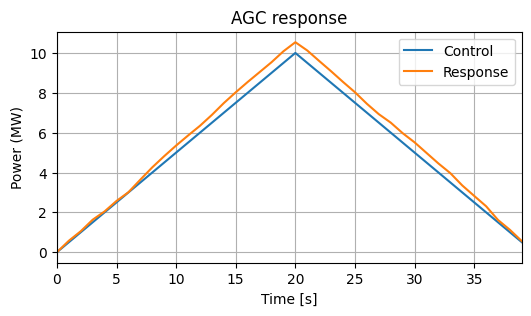

In [12]:
sse.plot_agc()

(<Figure size 600x300 with 2 Axes>,
 <AxesSubplot:title={'center':'EVA'}, xlabel='Time [s]', ylabel='Power (MW)'>)

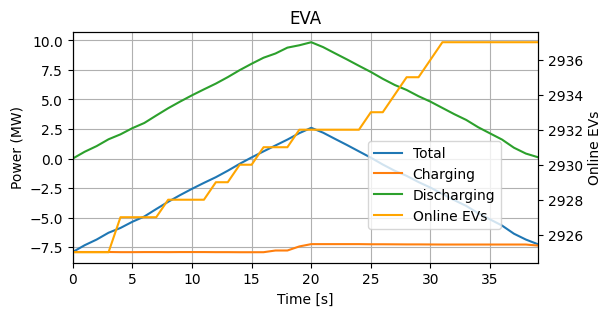

In [13]:
sse.plot()